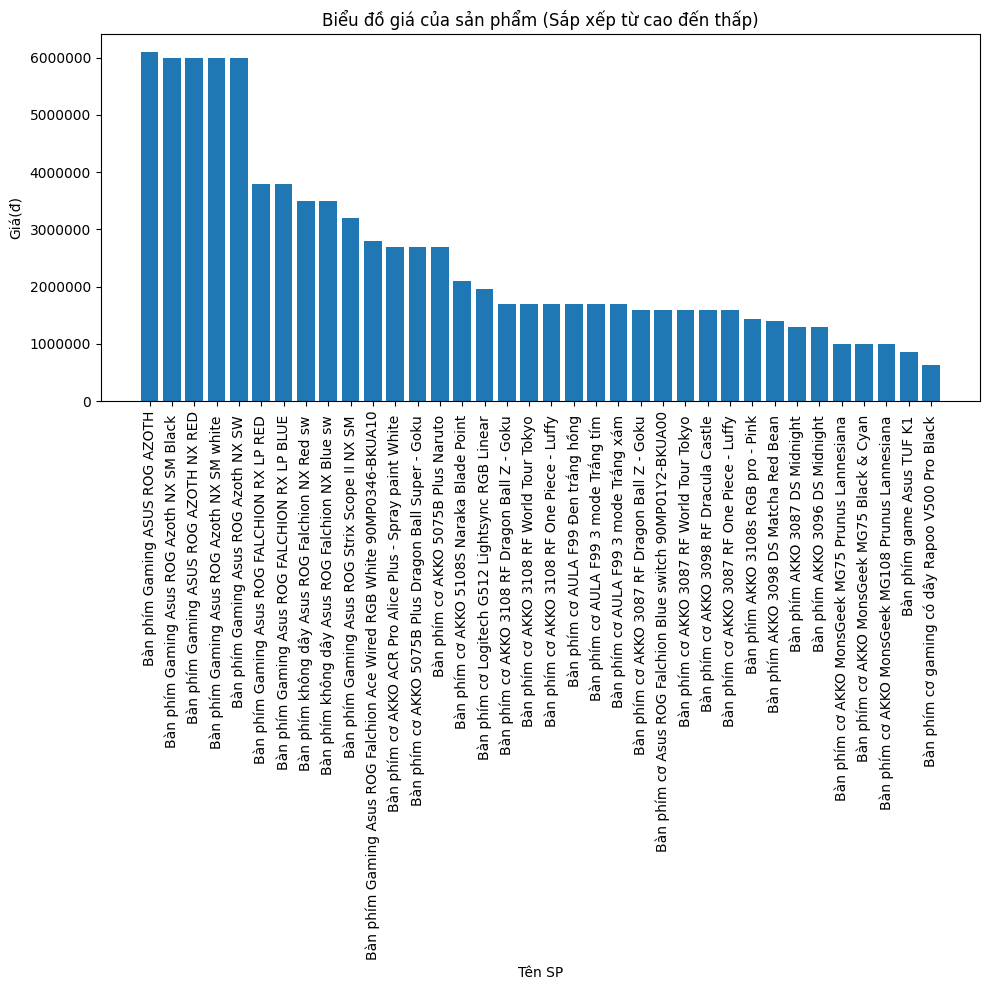

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Sắp xếp dữ liệu theo cột 'Giá(đ)' từ cao đến thấp
data_sorted = data.sort_values(by='Giá(đ)', ascending=False)

# Trực quan hóa dữ liệu
# Ví dụ: Trực quan hóa biểu đồ cột cho cột 'Giá(đ)' đã được sắp xếp
plt.figure(figsize=(10, 10))
plt.bar(data_sorted['Tên SP'], data_sorted['Giá(đ)'])
plt.xlabel('Tên SP')
plt.ylabel('Giá(đ)')
plt.title('Biểu đồ giá của sản phẩm (Sắp xếp từ cao đến thấp)')
plt.xticks(rotation=90)  # Xoay nhãn trục x nếu cần

# Định dạng nhãn trục y để hiển thị giá trị cụ thể
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Sắp xếp dữ liệu theo cột 'Giá(đ)' từ thấp đến cao và lấy 5 dòng đầu tiên
lowest_price_products = data.nsmallest(5, 'Giá(đ)')

# Hiển thị 5 sản phẩm có giá thấp nhất
print(lowest_price_products)


                                         Tên SP Nhà sản xuất Model  \
442                  Bàn phím số Rapoo K10 đen         Rapoo   K10   
430              Bàn phím văn phòng Lecoo KB102        LECOO   KB1   
238             Bàn phím có dây Genius KB-100X        Genius     0   
239            Bàn phím có dây Genius KB-100XP        Genius     0   
256  Bàn phím gỉa cơ gaming AULA F2023 Màu đen          AULA     0   

        Kết nối     Kích thước Loại switch  Giá(đ)  
442           0  151 * 88 * 26           0  119000  
430           0              0           0  149000  
238  có dây USB           435            0  169000  
239  có dây USB           435            0  209000  
256           0           435         Blue  249000  


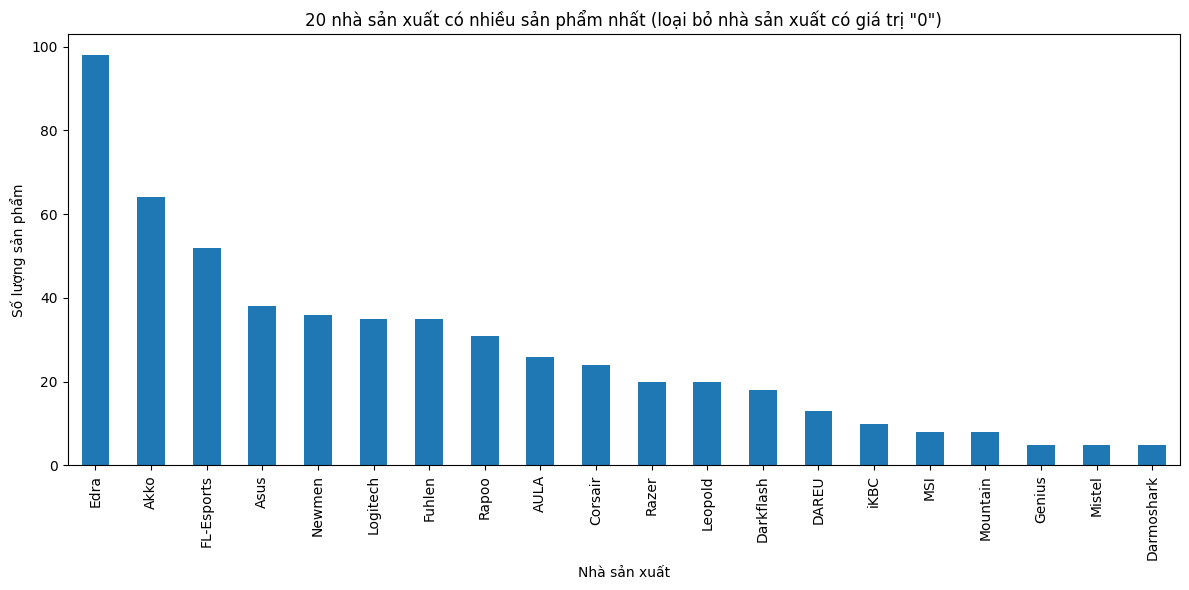

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Loại bỏ các dòng có giá trị của cột 'Nhà sản xuất' là '0'
data_filtered = data[data['Nhà sản xuất'] != '0']

# Đếm số lượng sản phẩm của mỗi nhà sản xuất (sau khi loại bỏ '0')
manufacturer_counts = data_filtered['Nhà sản xuất'].value_counts()

# Chọn 50 nhà sản xuất có nhiều sản phẩm nhất
top_manufacturers = manufacturer_counts.head(20)

# Vẽ biểu đồ số lượng sản phẩm của các nhà sản xuất đã chọn
plt.figure(figsize=(12, 6))
top_manufacturers.plot(kind='bar')
plt.xlabel('Nhà sản xuất')
plt.ylabel('Số lượng sản phẩm')
plt.title('20 nhà sản xuất có nhiều sản phẩm nhất ')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Lấy các giá trị duy nhất trong cột "Nhà sản xuất"
unique_size = data['Kích thước'].unique()
unique_size_count = data['Kích thước'].nunique()


# In ra các giá trị độc nhất của cột "kích thước"
print(unique_size_count)

135


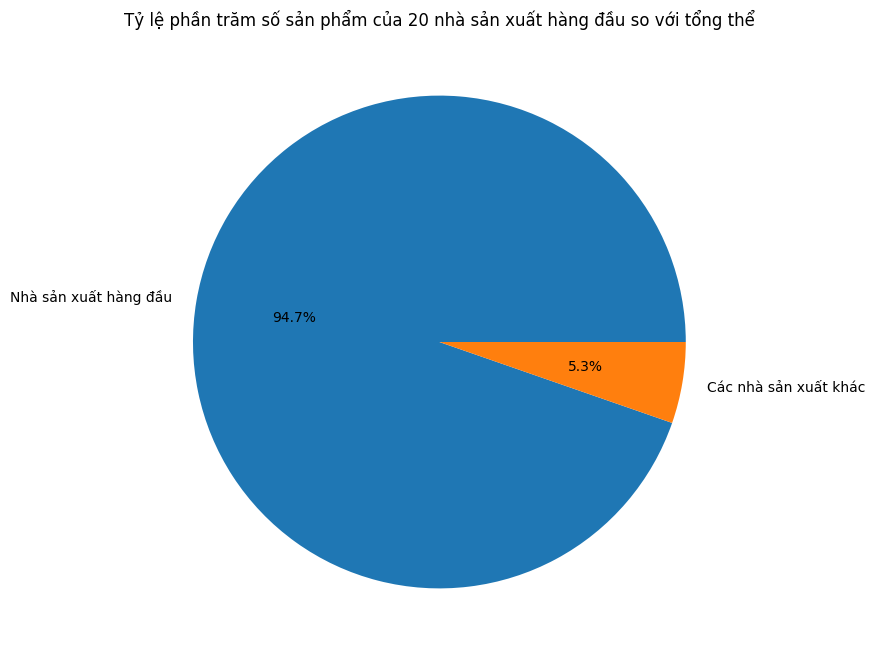

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Đếm số lượng sản phẩm của mỗi nhà sản xuất
manufacturer_counts = data['Nhà sản xuất'].value_counts()

# Sắp xếp theo số lượng sản phẩm giảm dần và chọn 30 nhà sản xuất đầu tiên
top_manufacturers = manufacturer_counts.head(20)

# Tính tỷ lệ phần trăm số sản phẩm của 30 nhà sản xuất này so với tổng thể
total_products = data.shape[0]
percentage = (top_manufacturers.sum() / total_products) * 100

# Trực quan hóa tỷ lệ phần trăm bằng biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie([percentage, 100 - percentage], labels=['Nhà sản xuất hàng đầu', 'Các nhà sản xuất khác'], autopct='%1.1f%%')
plt.title('Tỷ lệ phần trăm số sản phẩm của 20 nhà sản xuất hàng đầu so với tổng thể')
plt.show()


In [16]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Đếm số lượng nhà sản xuất độc nhất
unique_manufacturer_count = data['Nhà sản xuất'].nunique()

# In ra số lượng nhà sản xuất độc nhất
print("Số lượng nhà sản xuất độc nhất:", unique_manufacturer_count)


Số lượng nhà sản xuất độc nhất: 32


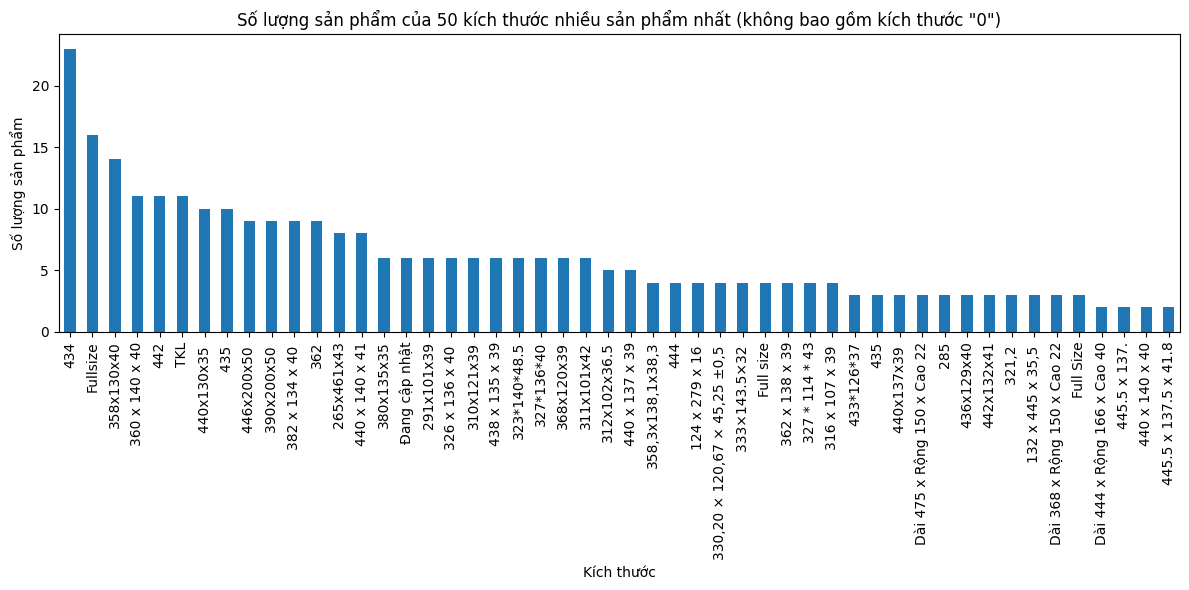

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Lọc dữ liệu để loại bỏ kích thước '0'
data_filtered = data[data['Kích thước'] != '0']

# Đếm số lượng sản phẩm cho mỗi kích thước và sắp xếp giảm dần
size_counts = data_filtered['Kích thước'].value_counts().sort_values(ascending=False)

# Chọn 50 kích thước nhiều sản phẩm nhất
top_50_sizes = size_counts.head(50)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
top_50_sizes.plot(kind='bar')
plt.xlabel('Kích thước')
plt.ylabel('Số lượng sản phẩm')
plt.title('Số lượng sản phẩm của 50 kích thước nhiều sản phẩm nhất (không bao gồm kích thước "0")')
plt.xticks(rotation=90)  # Xoay nhãn trục x nếu cần
plt.tight_layout()
plt.show()


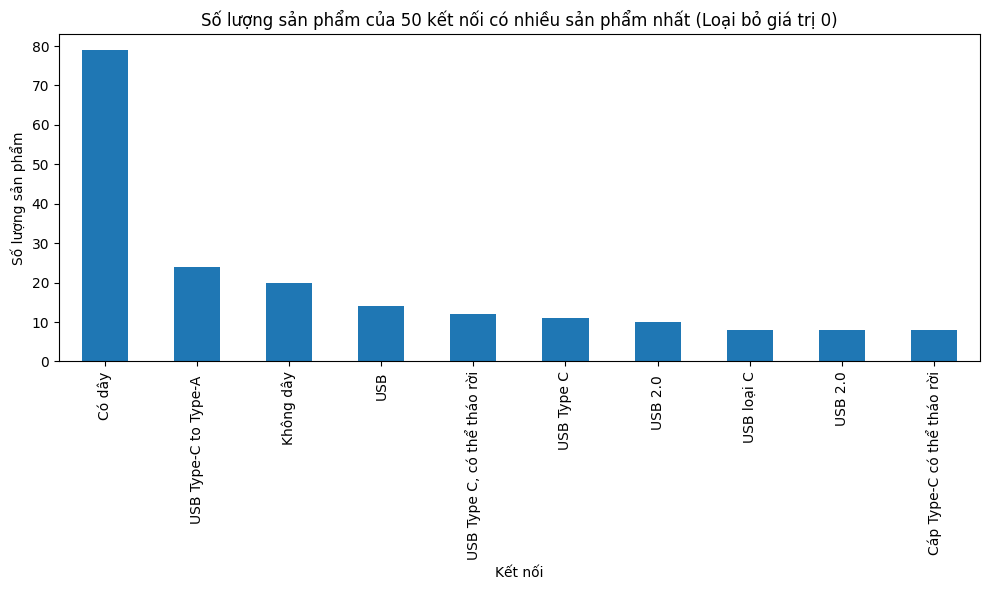

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Loại bỏ các dòng có giá trị '0' trong cột 'Kết nối'
data = data.loc[data['Kết nối'] != '0']

# Đếm số lượng sản phẩm của mỗi kết nối
product_count_by_connection = data['Kết nối'].value_counts()

# Chọn ra 50 kết nối có nhiều sản phẩm nhất
top_50_connections = product_count_by_connection.head(10)

# Vẽ biểu đồ số lượng sản phẩm của các kết nối này
plt.figure(figsize=(10, 6))
top_50_connections.plot(kind='bar')
plt.xlabel('Kết nối')
plt.ylabel('Số lượng sản phẩm')
plt.title('Số lượng sản phẩm của 50 kết nối có nhiều sản phẩm nhất (Loại bỏ giá trị 0)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
